In [1]:
#%run MChain.ipynb
import numpy as np
import graphviz as gv
from MChain import MChain 

# construct a Markov chain

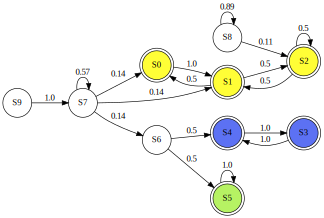

In [2]:
# building a chain using an (unnormalized) transition matrix

T10 = np.array([[0,1,0,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,1,1,0,0,0,0],[1,1,0,0,0,0,1,4,0,0],
                [0,0,1,0,0,0,0,0,8,0],[0,0,0,0,0,0,0,1,0,0]])

mc = MChain()
mc.from_matrix(T10, prefix='S')
mc.display() #, size='1500)

# running a chain

In [3]:
for _ in range(5):
    print(mc.run(start='S9', steps=10))

['S7', 'S7', 'S7', 'S7', 'S7', 'S7', 'S7', 'S0', 'S1', 'S0']
['S7', 'S7', 'S6', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5']
['S7', 'S0', 'S1', 'S2', 'S1', 'S0', 'S1', 'S2', 'S1', 'S2']
['S7', 'S7', 'S7', 'S6', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5']
['S7', 'S1', 'S2', 'S2', 'S1', 'S0', 'S1', 'S0', 'S1', 'S2']


In [4]:
for _ in range(5):
    print(mc.run(start='S9', steps=100, stop_states=['S0'], early_stop=True))

['S7', 'S7', 'S7', 'S7', 'S6']
['S7', 'S7', 'S6']
['S7', 'S7', 'S1', 'S0']
['S7', 'S7', 'S7', 'S7', 'S1', 'S2', 'S1', 'S0']
['S7', 'S0']


In [5]:
for _ in range(5):
    print(mc.run(start='S9', steps=100, stop_classes=[1], early_stop=True))

['S7', 'S7', 'S6']
['S7', 'S7', 'S0']
['S7', 'S0']
['S7', 'S6']
['S7', 'S1']


In [6]:
for _ in range(5):
    print(mc.run(start='S9', steps=10, stop_states=['S1'], visits= 3, early_stop=False))

['S7', 'S7', 'S6', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5']
['S7', 'S7', 'S6', 'S4', 'S3', 'S4', 'S3', 'S4', 'S3', 'S4']
['S7', 'S7', 'S6', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5', 'S5']
['S7', 'S7', 'S0', 'S1', 'S2', 'S1', 'S2', 'S2', 'S2', 'S1']
['S7', 'S7', 'S0', 'S1', 'S0', 'S1', 'S0', 'S1']


# compare data to experimental data 

In [7]:
mc.analyse()

In [8]:
# Hij: probability to reach a state

n = 1000
start = 'S9'
stop = 'S5'
traces = []
for _ in range(n):
    trace = mc.run(start=start, steps=100, stop_states=[stop], early_stop=True)
    traces.append(trace) 


print(mc.Hij(start,stop), float(np.array([stop== trace[-1] for trace in traces]).sum()/n))

0.16666666666666666 0.173


In [9]:
print(np.round(mc.H,2))

[[1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.5  0.5  0.   0.   0.   0.  ]
 [0.67 0.67 0.67 0.17 0.17 0.17 0.33 0.57 0.   0.  ]
 [1.   1.   1.   0.   0.   0.   0.   0.   0.89 0.  ]
 [0.67 0.67 0.67 0.17 0.17 0.17 0.33 1.   0.   0.  ]]


In [10]:
# Qi distribution of absorbing classes 

n = 10000
start = 'S9'
stop_classes = np.unique(mc.c[mc.r])
traces = []
for _ in range(n):
    trace = mc.run(start=start, steps=100, stop_classes=stop_classes, early_stop=True)
    traces.append(trace) 

print(mc.Qi(start)) 

l = list()
for stop_class in stop_classes:
    l.append(float(np.array([stop_class==mc.ci(trace[-1]) for trace in traces]).sum()/n))
print(l)

[0.66666667 0.16666667 0.16666667]
[0.665, 0.1688, 0.1662]


In [11]:
print(np.round(mc.Q,2))

[[1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.5  0.5 ]
 [0.67 0.17 0.17]
 [1.   0.   0.  ]
 [0.67 0.17 0.17]]


In [12]:
#di relative time spending in state 

n = 10000
start = 'S2'
traces = []
trace = mc.run(start=start, steps=n)

print(float(mc.di(start)), float((np.array(trace)==start).sum()/n))

0.4 0.3992


In [13]:
print(np.round(mc.d,2))

[0.2 0.4 0.4 0.5 0.5 1.  0.  0.  0.  0. ]


# birth-death process

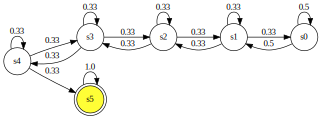

In [14]:
N = 6

U = np.eye(N) + np.eye(N,k=-1) + np.eye(N,k=1)
U[N-1,N-2] = 0

mc1 = MChain()
mc1.from_matrix(U)
mc1.display()
mc1.analyse()

In [15]:
# Tij expected time to visit state j 

n = 1000
start = 's1'
stop_state = 's3'
traces = []
for _ in range(n):
    trace = mc1.run(start=start, steps=1000, stop_states=[stop_state], early_stop=True)
    traces.append(trace) 

print(mc1.Tij(start, stop_state), float(np.array([len(trace) for trace in traces if trace[-1]==stop_state]).mean()))

12.99999999999999 13.237


In [16]:
print(mc1.T)

[[-1.  2.  7. 15. 26. 40.]
 [-1. -1.  5. 13. 24. 38.]
 [-1. -1. -1.  8. 19. 33.]
 [-1. -1. -1. -1. 11. 25.]
 [-1. -1. -1. -1. -1. 14.]
 [-1. -1. -1. -1. -1.  1.]]


In [17]:
# Vij expected visits to state j 

n = 1000
start = 's0'
stop_state = 's5'
visit_state = 's3'
traces = []
for _ in range(n):
    trace = mc1.run(start=start, steps=1000, stop_states=[stop_state], early_stop=True)
    traces.append(trace)
    
counts = [(np.array(trace)==visit_state).sum() for trace in traces if trace[-1]==stop_state]

print(mc1.Vij(start, visit_state), float(np.array(counts).mean()))

5.999999999999989 5.832


In [18]:
print(mc1.V)

[[ 9. 12.  9.  6.  3. -1.]
 [ 8. 11.  9.  6.  3. -1.]
 [ 6.  9.  8.  6.  3. -1.]
 [ 4.  6.  6.  5.  3. -1.]
 [ 2.  3.  3.  3.  2. -1.]
 [ 0.  0.  0.  0.  0. -1.]]
